In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from model import GolemTS2
from generate_data import SyntheticDataset

In [3]:
d = 10
p = 1
n = 1000

A_init = np.random.randn((p+1) *d, d)
dag_obj = SyntheticDataset(n=n, d=d, p=p, B_scale=1.0, graph_type='ER', degree=2, A_scale=1.0, noise_type='NV')
model = GolemTS2(n=n, d=d, p=p, Y=dag_obj.Y, lambda_1=1.5e-2, lambda_2=5.0, A_init=None, ev=False, lr=3e-3, lambda_3=2.0)

In [4]:
import trainer
likes, evs = trainer.train(model, dag_obj.Y, epochs=40_000, warmup_epochs=10_000, log=True)

likelihood: 58.34044647216797
likelihood: 49.480201721191406
likelihood: 48.72545623779297
likelihood: 48.442447662353516
likelihood: 48.256805419921875
likelihood: 48.15814208984375
likelihood: 48.10104751586914
likelihood: 48.05112075805664
likelihood: 48.02220153808594
likelihood: 47.99468994140625
likelihood: 47.97548294067383
likelihood: 47.9610595703125
likelihood: 47.9566535949707
likelihood: 47.94637680053711
likelihood: 47.95215606689453
likelihood: 47.94716262817383
likelihood: 47.93735122680664
likelihood: 47.94464111328125
likelihood: 47.941612243652344
likelihood: 47.93979263305664
likelihood: 47.94657516479492
likelihood: 47.93983840942383
likelihood: 47.93973159790039
likelihood: 47.943904876708984
likelihood: 47.942195892333984
likelihood: 47.94407272338867
likelihood: 47.94763946533203
likelihood: 47.94154739379883
likelihood: 47.9412841796875
likelihood: 47.94145965576172
likelihood: 47.9398078918457
likelihood: 47.94464111328125
likelihood: 47.945491790771484
likelih

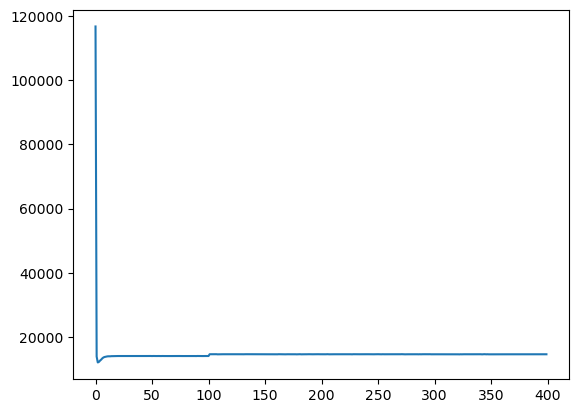

In [5]:
plt.plot(evs)

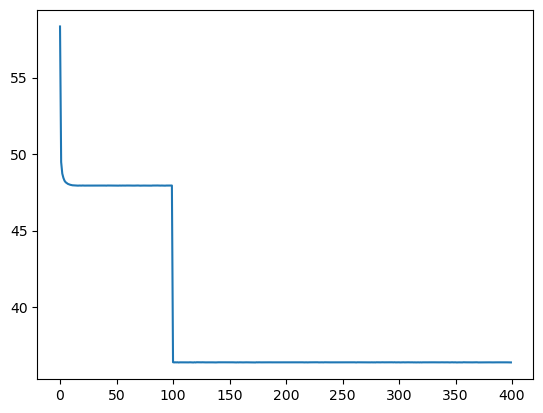

In [6]:
plt.plot(likes)

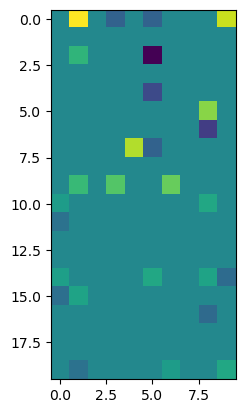

In [7]:
plt.imshow(dag_obj.A)

In [8]:
model.B

Parameter containing:
tensor([[ 2.5916e-04,  1.8158e+00, -1.9437e-04, -4.3056e-01, -3.9635e-04,
         -4.1207e-01, -2.4251e-02, -2.2759e-04, -3.6495e-02,  1.5905e+00,
          6.1749e-04,  1.1796e-03, -7.3717e-04, -7.0406e-04, -9.7846e-04,
         -5.0643e-04, -5.5775e-04,  3.1243e-04, -1.7503e-04, -1.0652e-04],
        [ 1.4541e-03,  4.6632e-03,  3.6011e-04, -9.4646e-04,  1.6741e-03,
         -2.4990e-02, -2.6172e-04, -3.9933e-03, -1.4302e-02,  7.6157e-03,
         -4.1321e-04,  5.9227e-04,  1.5465e-05, -2.7458e-04, -1.0022e-03,
         -4.9387e-05, -1.0276e-03, -3.1562e-04,  1.4795e-04, -2.0407e-04],
        [-1.2853e-03,  6.4031e-01, -4.7815e-04, -3.8064e-02, -3.3555e-04,
         -1.6467e+00,  1.3570e-04,  7.8457e-05, -8.9547e-03,  3.6965e-02,
         -2.6502e-04, -6.9141e-04, -4.8798e-04, -4.4828e-04, -1.0106e-04,
          3.8179e-04,  1.4362e-04, -3.7791e-05, -2.9248e-04,  2.5635e-04],
        [ 2.7464e-04,  1.7390e-02, -5.9832e-03,  4.6879e-04, -8.0138e-04,
         -1.2

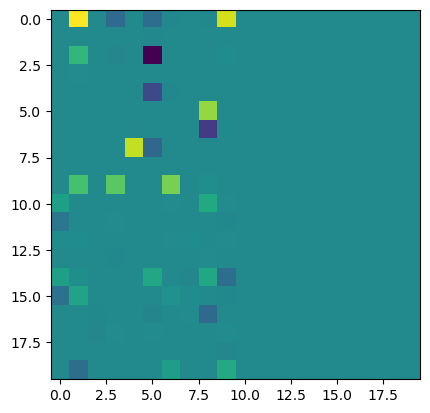

In [9]:
plt.imshow(model.B.detach().numpy())

In [10]:
model_B = model.B.detach().numpy()
model_B[np.abs(model_B) < 0.3] = 0

In [11]:
import testing_utils

In [12]:
model_B = testing_utils.postprocess(model_B)

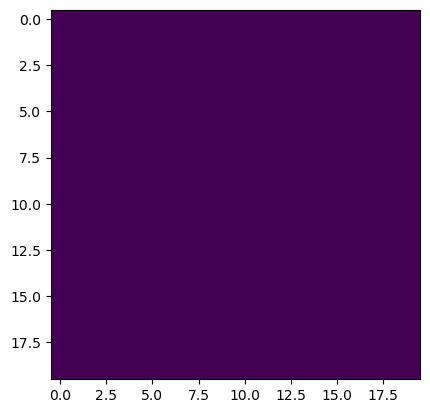

In [13]:
plt.imshow(testing_utils.postprocess(model_B) - model_B)

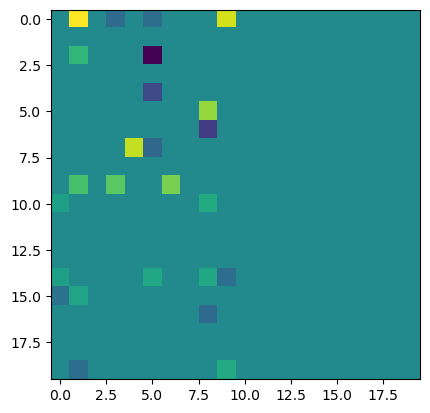

In [14]:
plt.imshow(model_B)

In [15]:
np.diag(model_B)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

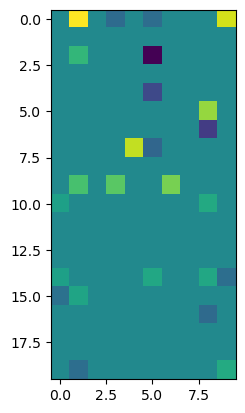

In [16]:
model_A = model_B[:, :d]
plt.imshow(model_A)

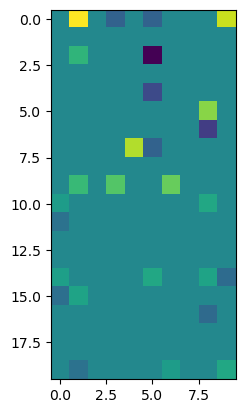

In [17]:
plt.imshow(dag_obj.A)

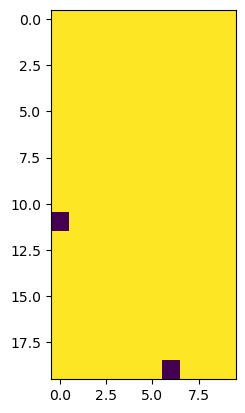

In [18]:
plt.imshow(((dag_obj.A != 0).astype(int) == (model_A !=0 ).astype(int))**2)

In [19]:
(dag_obj.A != 0).astype(int)

array([[0, 1, 0, 1, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 1, 1],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 1]])